# MATH 210 Introduction to Mathematical Computing

## March 12, 2018

1. Linear slgebra applications
    * linear regression
    * Graham-Schmict algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
%matplotlib inline

## Linear regression

Let's make some fake data:

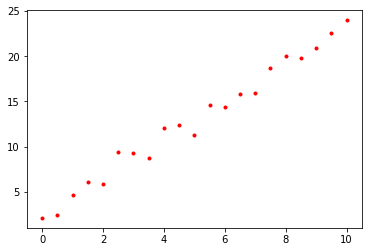

In [5]:
N = 20 ; a = 2 ; b = 3
x =np.linspace(0,10,N+1)
noise = np.random.randn(N+1)
y = a*x + 3 + noise
plt.plot(x,y,'r.')
plt.show()

Let's use linear regression to fit a line to our data...

The general idea pf linear regression is, given $N+1$ data points $\{ (x_0,y_0),(x_1,y_1),\dot,(x_N,y_N) \}$, we want find coeffeicients $alpha$ and $beta$ such that the linear model

$$
t = \alpha x + \beta
$$

best fits the data by minimizing the sum of square errors:

$$
SSE = \sum_{k=0}^N (y_k -(\alpha x_k + \beta))^2
$$


If we introduce matrices $X$ and $Y$ where

$$
X = \begin{bmatrix} 1 & x_0 \\ 1 & x_1 \\ \vdots & \vdots \\
1 & x_N \end{bmatrix}
 \ \
Y = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_N \end{bmatrix}
 \ \
A = \begin{bmatrix} \beta \\ \alpha \end{bmatrix}
$$

$$
SSE = \|XA - Y\|^2
$$

We need to find $A$ such that distance from $XA$ to $Y$ is minimal! The answer is the solution the equation: 

$$
(X^T X)A = X^T (XA) = X^TY
$$

In [12]:
X = np.column_stack([np.ones(N+1),x])
Y = y.reshape(N+1,1)

In [13]:
A = la.solve(X.T @ X, X.T @ Y)

In [14]:
print(A)

[[ 2.3537005 ]
 [ 2.11053023]]


In [15]:
y_model = A[0,0] + A[1,0]*x

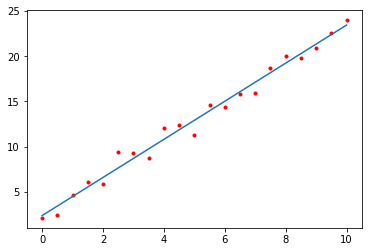

In [17]:
plt.plot(x,y,'r.',x,y_model);

We can do the same to fit a higher degree polynomial to data:

If we introduce matrices $X$, $Y$ and $A$ where

$$
X = \begin{bmatrix} 
1 & x_0 & x_0^2 & \dots & x_0^d \\ 
1 & x_1 & x_1^2 & \dots & x_1^d \\ 
\vdots & & & & \vdots \\
1 & x_N & x_N^2 & \dots & x_N^d 
\end{bmatrix}
\ \
Y = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_N \end{bmatrix}
\ \
A = \begin{bmatrix} a_0 \\ a_1 \\ \dots \\ a_d \end{bmatrix}
$$

then

$$
SSE = \|XA - Y\|^2
$$

Let's make some fake data:

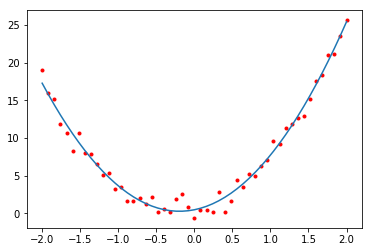

In [3]:
N = 50; a_0 = 1; a_1 = 2; a_2 =5;
x = np.linspace(-2,2,N+1)
noise = np.random.randn(N+1)
y = a_0 + a_1*x + a_2*x**2 + noise

X = np.column_stack([np.ones(N+1),x,x**2])
Y = y.reshape(N+1,1)

A = la.solve(X.T @ X, X.T @ Y)

y_model = A[0,0] + A[1,0]*x + A[2,0]*x**2

plt.plot(x,y,'r.',x,y_model);